In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
import tensorflow as tf
import cv2 
import os
import numpy as np;
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip "/content/drive/My Drive/vision_2022/Practico-13/dataset.zip"

In [260]:
#array de autos
pathAutos = '/content/dataset/test/autos'
autos=[]
img_size=125

for img in os.listdir(pathAutos):
    img = cv2.imread(os.path.join(pathAutos, img))
    img_resize= cv2.resize(img,(img_size,img_size))
    autos.append(img_resize)

autos = np.array(autos)
print(autos.shape)

(14, 125, 125, 3)


In [259]:
#array de bicicletas
pathBicicletas = '/content/dataset/test/bicicletas'
bicicletas=[]
img_size=125

for img in os.listdir(pathBicicletas):
    img = cv2.imread(os.path.join(pathBicicletas, img))
    img_resize= cv2.resize(img,(img_size,img_size))
    bicicletas.append(img_resize)


bicicletas = np.array(bicicletas)
print(bicicletas.shape)

(15, 125, 125, 3)


In [258]:
#array de motos
pathMotos = '/content/dataset/test/motos'
motos=[]
img_size=125

for img in os.listdir(pathMotos):
    img = cv2.imread(os.path.join(pathMotos, img))
    img_resize= cv2.resize(img,(img_size,img_size))
    motos.append(img_resize)


motos = np.array(motos)
print(motos.shape)

(16, 125, 125, 3)


In [262]:
#Se arman los sets de entrenamiento y test
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/dataset/train',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/dataset/test',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

print(training_set.class_indices)

Found 668 images belonging to 3 classes.
Found 43 images belonging to 3 classes.
{'autos': 0, 'bicicletas': 1, 'motos': 2}


In [263]:
import tensorflow as tf                                                         
                                                                                                                                                                
model = tf.keras.models.Sequential([            
  tf.keras.layers.experimental.preprocessing.Resizing(64, 64,
                                                      interpolation='bilinear'),                          
  tf.keras.layers.Conv2D(16, (6, 6), activation='relu',                          
                         input_shape=(64, 64, 3)),     
  tf.keras.layers.Conv2D(36, (5, 5), strides=(3, 3), activation='relu'),
  tf.keras.layers.Conv2D(48, (4, 4), strides=(3, 3), activation='relu'),        
  tf.keras.layers.Flatten(),                                                    
  tf.keras.layers.Dropout(rate=.25),                                            
  tf.keras.layers.Dense(200, activation='relu'),                                
  tf.keras.layers.Dense(3, activation='softmax')                               
])                                                                              
                                                                                
optimizer = tf.keras.optimizers.Adam(decay=.0001)                               
                                                                                
model.compile(optimizer=optimizer,                                              
              loss='sparse_categorical_crossentropy',                           
              metrics=['accuracy'])



In [ ]:
history = model.fit(training_set, epochs = 30)

In [ ]:
model.evaluate(test_set)

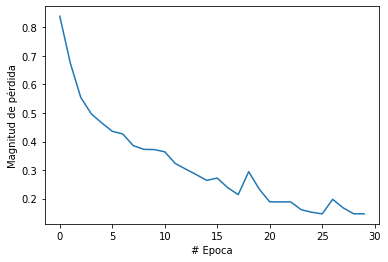

In [265]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

Clases
{'autos': 0, 'bicicletas': 1, 'motos': 2}
Predicción: 0


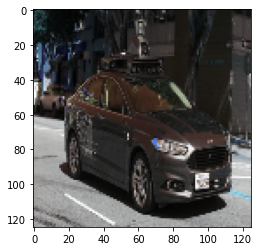

In [267]:
#Se ejecuta la prediccion sobre el array de autos
imagenAPredecir = autos[0]
imagen = (np.expand_dims(imagenAPredecir, 0))
plt.imshow(imagenAPredecir)
predictions_single = model.predict(imagen)
print("Clases")
print(training_set.class_indices)
print("Predicción:", np.argmax(predictions_single))

Clases
{'autos': 0, 'bicicletas': 1, 'motos': 2}
Predicción: 1


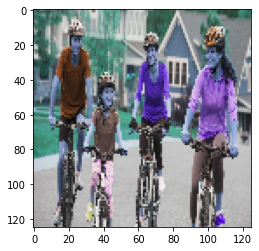

In [272]:
#Se ejecuta la prediccion sobre el array de bicicletas
imagenAPredecir = bicicletas[0]
imagen = (np.expand_dims(imagenAPredecir, 0))
plt.imshow(imagenAPredecir)
predictions_single = model.predict(imagen)
print("Clases")
print(training_set.class_indices)
print("Predicción:", np.argmax(predictions_single))


Clases
{'autos': 0, 'bicicletas': 1, 'motos': 2}
Predicción: 2


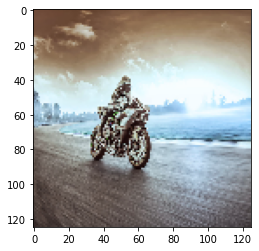

In [271]:
#Se ejecuta la prediccion sobre el array de motos
imagenAPredecir = motos[3]
imagen = (np.expand_dims(imagenAPredecir, 0))
plt.imshow(imagenAPredecir)
predictions_single = model.predict(imagen)
print("Clases")
print(training_set.class_indices)
print("Predicción:", np.argmax(predictions_single))